In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('cpu')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 500, hidden_layers = [10, 10], learning_rate = 0.005, calibration_threshold = .03)

initial loss:  3.5827789306640625
nllk loss:  tensor(1.0773, grad_fn=<MeanBackward0>) kernel loss: tensor(0.8351, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.8987, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5194, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.7371, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4831, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.7759, grad_fn=<MeanBackward0>) kernel loss: tensor(1.0818, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.6885, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4569, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.6305, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4723, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.5175, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5267, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.4638, grad_fn=<MeanBackward0>) kernel loss: tensor(1.4196, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.5775, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6538, grad_fn=<AddBackward0>)
nllk loss:  tensor(0.4230, gra

nllk loss:  tensor(-2.9085, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2966, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8205, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5076, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.3790, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0865, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.2698, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2346, grad_fn=<AddBackward0>)
nllk loss:  tensor(-1.8695, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0339, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.7027, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0984, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8155, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0168, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.9422, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2352, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.9429, grad_fn=<MeanBackward0>) kernel loss: tensor(0.6360, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.8932, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.0263, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4145, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.0943, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0840, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1506, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0201, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1462, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0598, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1618, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2212, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1437, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1862, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1474, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0984, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.0930, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2203, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1462, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2247, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1806, grad_fn=<MeanBackward0>) ke

nllk loss:  tensor(-3.2150, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2358, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1876, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0032, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.2523, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1363, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.2165, grad_fn=<MeanBackward0>) kernel loss: tensor(0., grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.2385, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0209, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.2136, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1323, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.2175, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0384, grad_fn=<AddBackward0>)
nllk loss:  tensor(-3.1663, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0811, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.7914, grad_fn=<MeanBackward0>) kernel loss: tensor(0.1312, grad_fn=<AddBackward0>)
nllk loss:  tensor(-2.7512, grad_fn=<MeanBackward0>) kernel

End2end test MAPE:  0.38616446
End2end test RMSE:  41.720596
End2end test NLLK:  8.550864
End2end test CRPS:  tensor(19.4394)


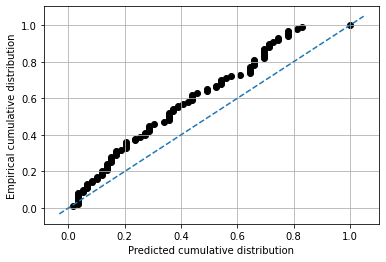

End2end test calibration error when step size is 0.001:  17.46463530594657
End2end test calibration error when step size is 0.01:  1.7402973283539216
End2end test calibration error when step size is 0.1:  0.1683567940247056


In [5]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.08it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.86it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.73it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           26.456
  RMSE          41.721
  MDAE          12.719
  MARPD         43.962
  R2            0.904
  Correlation   0.952
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.084
  Mean-absolute Calibration Error       0.062
  Miscalibration Area                   0.062
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.230
     Group Size: 0.56 -- Calibration Error: 0.143
     Group Size: 1.00 -- Calibration Error: 0.062
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.271
     Group Size: 0.56 -- Calibration Error: 0.136
     Group Size: 1.00 -- Calibration Error: 0.084
============

Lims is None. Setting lims now:
min_max_true: (7.0, 915.0)
min_max_pred: (-6.7221375, 769.12683)
lims: (-6.7221375, 915.0)
lims_ext: (-98.89435424804688, 1007.172216796875)


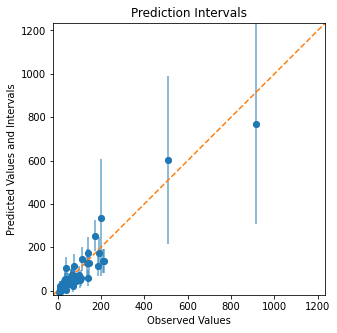

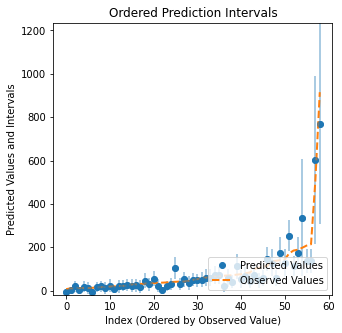

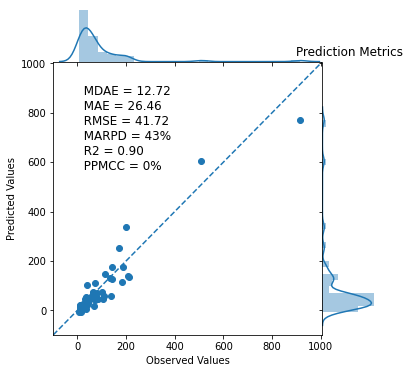

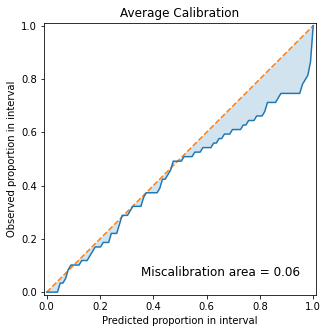

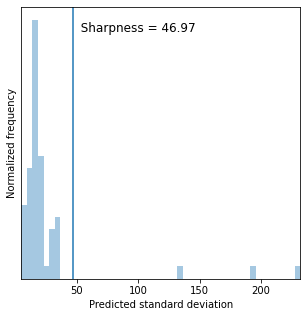

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))